In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import sklearn
from sklearn.model_selection import train_test_split

In [94]:
ion = 'Cl mg/l'
features = 'new_features.xlsx'

In [101]:
#-----Import the Excel as Dataframe
df1 = pd.read_excel(features,header = 0 ,index_col = 0,skiprows = [i for i in range(1,937)])
df2 = pd.read_excel('UHF.xlsx', header = 0, index_col = 0, skiprows = [i for i in range(1,937)], skip_blanks_lines = False,usecols = ['ID',ion])

In [102]:
#-----Interpolate the ion value with linear interpolation to fill the missing ones
df2.interpolate(inplace = True)

In [103]:
def min_max_normalization(array):
    return (array - array.min())/(array.max()-array.min())

Normalize the feature values and the exact values

In [104]:
for i in range(7):
    df1.values[:,i] = min_max_normalization(df1.values[:,i])
df2.values[:,0] = min_max_normalization(df2.values[:,0])

Split the data into a training set and a test set

In [105]:
X_train, X_test, y_train, y_test = train_test_split(df1, df2, test_size=0.2,random_state = 0)

Initialise the neural network, fit with our training set and then compute the prediction with the test set

Epoch 1/200
116/116 [==============================] - 0s 370us/step - loss: 0.0355
Epoch 2/200
116/116 [==============================] - 0s 353us/step - loss: 0.0026
Epoch 3/200
116/116 [==============================] - 0s 344us/step - loss: 0.0020
Epoch 4/200
116/116 [==============================] - 0s 349us/step - loss: 0.0018
Epoch 5/200
116/116 [==============================] - 0s 353us/step - loss: 0.0015
Epoch 6/200
116/116 [==============================] - 0s 344us/step - loss: 0.0014
Epoch 7/200
116/116 [==============================] - 0s 344us/step - loss: 0.0014
Epoch 8/200
116/116 [==============================] - 0s 352us/step - loss: 0.0013
Epoch 9/200
116/116 [==============================] - 0s 353us/step - loss: 0.0012
Epoch 10/200
116/116 [==============================] - 0s 361us/step - loss: 0.0012
Epoch 11/200
116/116 [==============================] - 0s 351us/step - loss: 0.0012
Epoch 12/200
116/116 [==============================] - 0s 361us/step - lo

116/116 [==============================] - 0s 361us/step - loss: 6.7393e-04
Epoch 94/200
116/116 [==============================] - 0s 352us/step - loss: 6.5020e-04
Epoch 95/200
116/116 [==============================] - 0s 353us/step - loss: 6.5736e-04
Epoch 96/200
116/116 [==============================] - 0s 352us/step - loss: 6.2996e-04
Epoch 97/200
116/116 [==============================] - 0s 344us/step - loss: 6.1495e-04
Epoch 98/200
116/116 [==============================] - 0s 353us/step - loss: 6.3339e-04
Epoch 99/200
116/116 [==============================] - 0s 344us/step - loss: 6.2649e-04
Epoch 100/200
116/116 [==============================] - 0s 353us/step - loss: 5.9676e-04
Epoch 101/200
116/116 [==============================] - 0s 353us/step - loss: 6.0944e-04
Epoch 102/200
116/116 [==============================] - 0s 353us/step - loss: 6.1720e-04
Epoch 103/200
116/116 [==============================] - 0s 352us/step - loss: 6.1642e-04
Epoch 104/200
116/116 [=======

116/116 [==============================] - 0s 353us/step - loss: 5.0728e-04
Epoch 185/200
116/116 [==============================] - 0s 353us/step - loss: 4.8482e-04
Epoch 186/200
116/116 [==============================] - 0s 348us/step - loss: 5.0617e-04
Epoch 187/200
116/116 [==============================] - 0s 352us/step - loss: 5.1113e-04
Epoch 188/200
116/116 [==============================] - 0s 351us/step - loss: 5.2949e-04
Epoch 189/200
116/116 [==============================] - 0s 361us/step - loss: 5.3471e-04
Epoch 190/200
116/116 [==============================] - 0s 353us/step - loss: 5.2154e-04
Epoch 191/200
116/116 [==============================] - 0s 344us/step - loss: 5.1393e-04
Epoch 192/200
116/116 [==============================] - 0s 353us/step - loss: 4.7506e-04
Epoch 193/200
116/116 [==============================] - 0s 344us/step - loss: 4.8318e-04
Epoch 194/200
116/116 [==============================] - 0s 353us/step - loss: 5.1031e-04
Epoch 195/200
116/116 [=

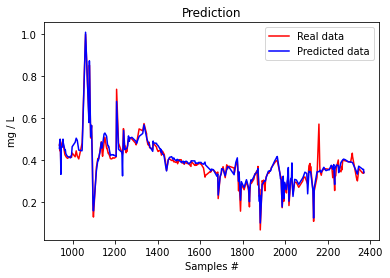

In [106]:
# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(32, activation = 'relu', input_dim = 7))

# Adding the second hidden layer
model.add(Dense(units = 16, activation = 'relu'))

# Adding the third hidden layer
model.add(Dense(units = 8, activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1))


X_train = X_train.sort_index()
y_train = y_train.sort_index()

model.compile(optimizer = 'adam',loss = 'mean_squared_error')
model.fit(X_train, y_train, batch_size = 10, epochs = 200)

X_test.sort_index()
index = X_test.index
y_pred = model.predict(X_test)
y_prime = DataFrame(y_pred,index)
y_prime = y_prime.sort_index()


y_test = y_test.sort_index()
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_prime, color = 'blue', label = 'Predicted data')
plt.ylabel('mg / L')
plt.xlabel('Samples #')
plt.title('Prediction')
plt.legend()
plt.show()

In [91]:
#----Compute the absolute mean difference between two arrays
def compute_diff(y_prime,y):
    ecart = 0
    for i in range(len(y_prime)):
        ecart += abs(y_prime[i]-y[i])
    mean = ecart /  len(y_prime)
    return mean

Compute the difference between the computed values and the exact ones

In [92]:
compute_diff(y_prime.values.flatten(),y_test.values.flatten())

0.016102486120932173